In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Ejercicio 1

In [2]:
datos_entrenamiento_csv = pd.read_csv('mnist_train.csv', header=None)
datos_entrenamiento = datos_entrenamiento_csv.values.tolist()

datos_testeo_csv = pd.read_csv('mnist_test.csv', header=None)
datos_testeo = datos_testeo_csv.values.tolist()

#### Inciso A

In [3]:
def vector_a_matriz(vector): # matriz 28x28
    matriz = []
    fila = []

    for i in range(0, 28):
        for j in range(0, 28):
            fila.append(vector[i*28+j])
        matriz.append(fila)
        fila = []
        
    return np.array(matriz)

def remover_indice_vector(vector):
    indice_del_vector = vector[0] 
    # Guardar matriz vectorizada sin el indice (primer elemento)
    vector_sin_indice = vector[1:]

    return indice_del_vector, vector_sin_indice

def grafico_matriz(matriz, indice):
    plt.imshow(matriz, cmap='gray')
    plt.title(indice)
    plt.show()

def graficar_imagen(datos, fila):
    # Guardar la matriz vectorizada
    vector = datos[fila]
    
    indice_del_vector, vector_sin_indice = remover_indice_vector(vector)
    
    matriz = vector_a_matriz(vector_sin_indice)

    grafico_matriz(matriz, indice_del_vector)

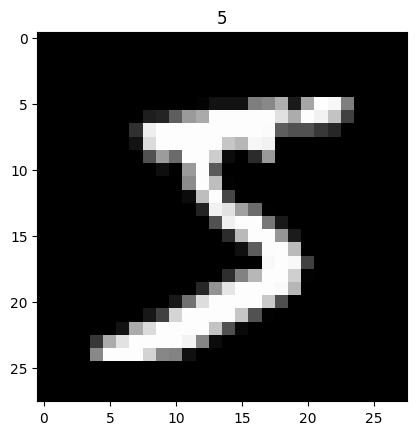

In [4]:
graficar_imagen(datos_entrenamiento, 0)

#### Inciso B

In [5]:
def cantidad_indices(datos, cantidad):
    indices = []
    suma = 0
    
    for i in range(0, cantidad):
        indices.append(int(datos[i][0]))
    
    for j in range(0, 10):
        print("Hay", indices.count(j), "imagenes del digito", j)
        suma = suma + indices.count(j)

In [6]:
cantidad_indices(datos_entrenamiento, len(datos_entrenamiento))

Hay 5923 imagenes del digito 0
Hay 6742 imagenes del digito 1
Hay 5958 imagenes del digito 2
Hay 6131 imagenes del digito 3
Hay 5842 imagenes del digito 4
Hay 5421 imagenes del digito 5
Hay 5918 imagenes del digito 6
Hay 6265 imagenes del digito 7
Hay 5851 imagenes del digito 8
Hay 5949 imagenes del digito 9


In [7]:
cantidad_indices(datos_testeo, len(datos_testeo))

Hay 980 imagenes del digito 0
Hay 1135 imagenes del digito 1
Hay 1032 imagenes del digito 2
Hay 1010 imagenes del digito 3
Hay 982 imagenes del digito 4
Hay 892 imagenes del digito 5
Hay 958 imagenes del digito 6
Hay 1028 imagenes del digito 7
Hay 974 imagenes del digito 8
Hay 1009 imagenes del digito 9


#### Inciso C

In [8]:
def imagen_promedio_de_digito(datos, cantidad_imagenes, digito):
   
   imagen_promedio = np.zeros((28,28))

   cantidad_imagenes_contadas = 0

   for i in range(0, cantidad_imagenes):
      if datos[i][0] == digito:
         _ , vector_sin_indice = remover_indice_vector(datos[i])
         imagen_promedio = imagen_promedio + vector_a_matriz(vector_sin_indice)
         cantidad_imagenes_contadas += 1
   
   imagen_promedio = imagen_promedio / cantidad_imagenes_contadas
   
   return imagen_promedio

def imagenes_promedio_de_digitos(datos, cantidad_imagenes):

   imagenes_promedio = []

   for i in range(0, 10):
      imagenes_promedio.append( imagen_promedio_de_digito(datos, cantidad_imagenes, i) )

   return imagenes_promedio

#### Inciso D

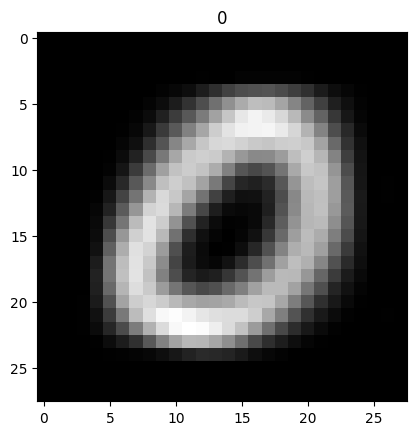

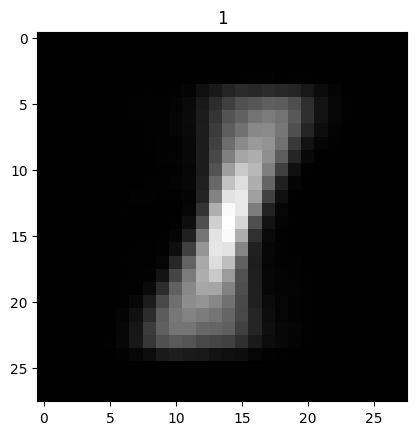

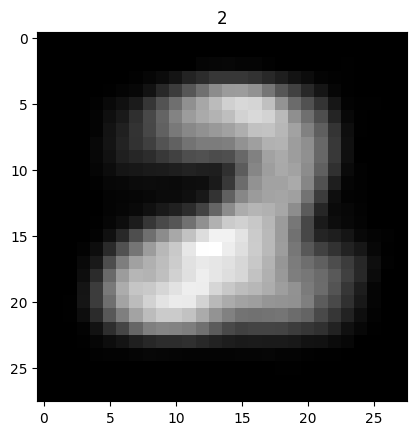

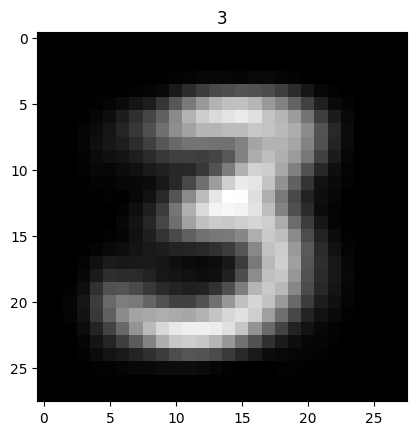

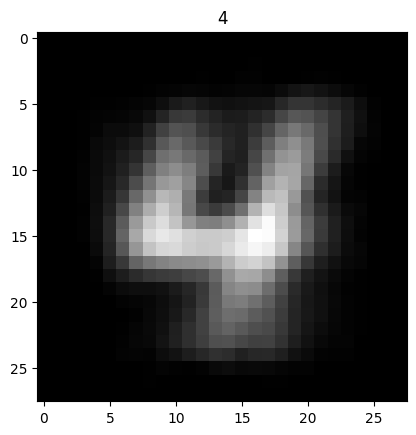

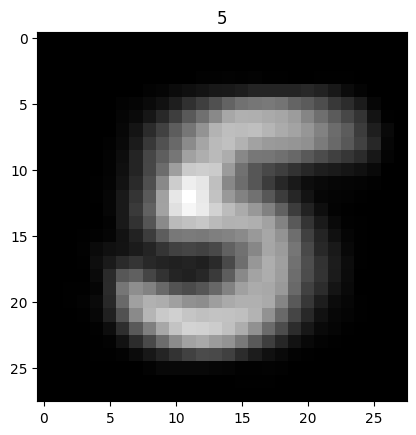

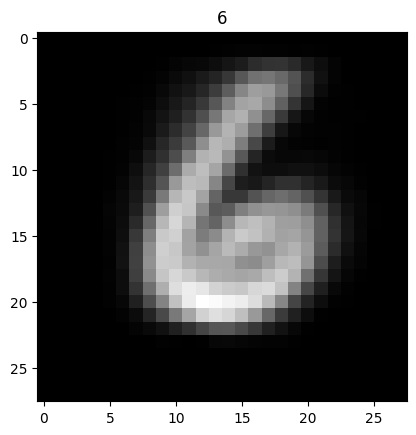

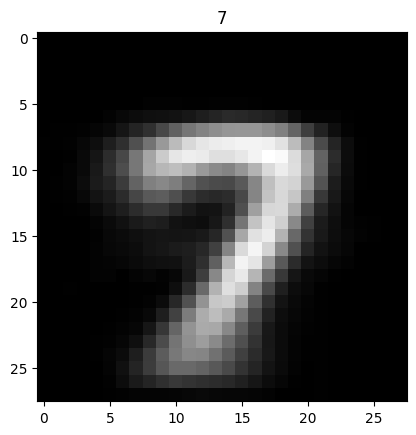

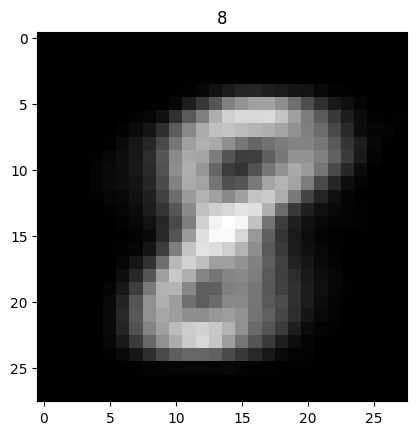

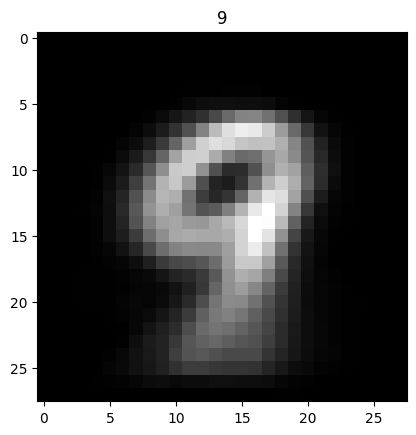

In [9]:
imagenes_promedio = imagenes_promedio_de_digitos(datos_entrenamiento, 2000)

for i in range(0, 10):
    grafico_matriz(imagenes_promedio[i], i)

### Ejercicio 2

#### Inciso A

In [10]:
#Agarramos una cantidad de filas de 
def filas_a_imagenes(datos, cantidad):
    
    imagenes = []
    indices = []

    for i in range(0, cantidad):
        indice_del_vector, vector_sin_indice = remover_indice_vector( datos[i] )
        matriz = vector_a_matriz( vector_sin_indice )
        imagenes.append( matriz )
        indices.append( indice_del_vector )

    return imagenes, indices

In [11]:
imagenes_de_testeo, indices_imagenes_de_testeo = filas_a_imagenes(datos_testeo, 200)

In [12]:
def predicciones(imagenes_promedio, imagenes_de_testeo):

    distancias = []
    distancia = 0
    predicciones = [] 

    for i in range(0, len(imagenes_de_testeo)):
        for j in range(0, 10): 
            distancia = np.linalg.norm( imagenes_promedio[j] - imagenes_de_testeo[i] )
            distancias.append( distancia )
        
        prediccion = distancias.index( min(distancias) )
        predicciones.append( prediccion )
        distancias.clear()

    return predicciones

In [13]:
predicciones = predicciones(imagenes_promedio, imagenes_de_testeo)

def precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones):

    precision = 0

    desaciertos = []
    
    for i in range(0, len(indices_imagenes_de_testeo)):
        if indices_imagenes_de_testeo[i] == predicciones[i]:
            precision += 1
        else: 
            
            desaciertos.append( (imagenes_de_testeo[i], indices_imagenes_de_testeo[i] , predicciones[i]) )


    precision = precision / len(predicciones)

    return desaciertos, precision


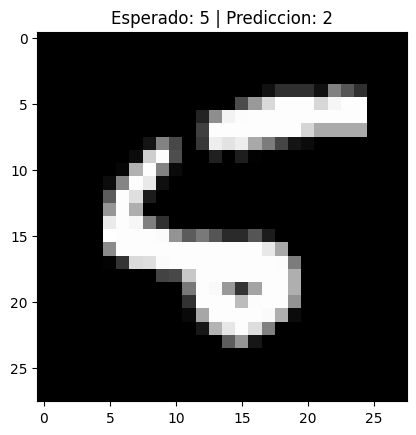

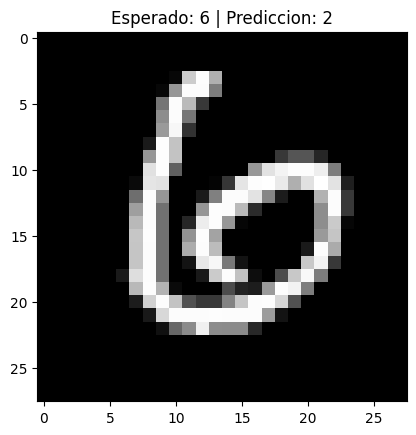

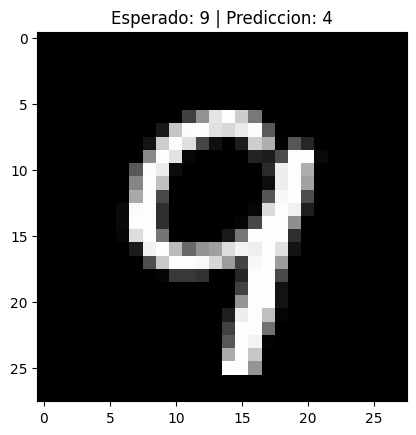

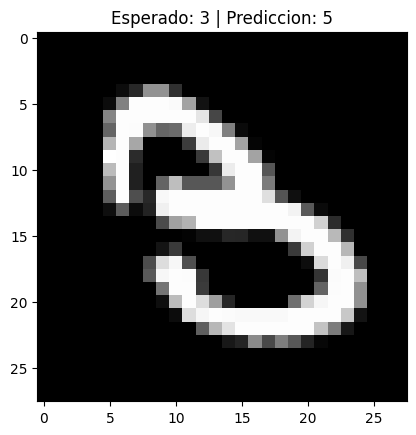

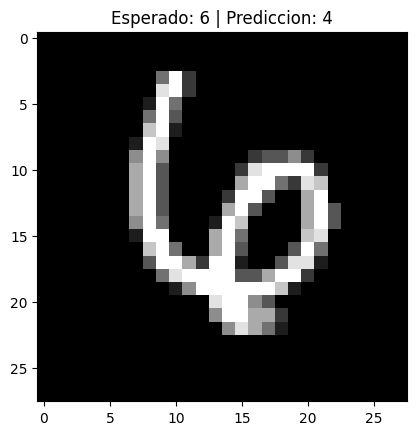

In [14]:
desaciertos, precision = precision_predicciones(imagenes_de_testeo, indices_imagenes_de_testeo, predicciones)
for i in range(0, 5):
    indice = desaciertos[i][1]
    prediccion = desaciertos[i][2]
    plt.title("Esperado: {} | Prediccion: {}".format(indice, prediccion))
    plt.imshow(desaciertos[i][0], cmap='gray')
    plt.show()
    

¿Considera buena la precision?

Consideramos que la precision es buena para solo considerar la distancia euclidea entre las imagenes, puesto que para la mayoria de los casos acerto (77%) y en los casos que desacertó alguno de los digitos transcriptos no se reconocen con facilidad y otros son muy parecidos a otros numeros.


### Ejercicio 3

In [58]:
e = 10**(-15) # error de maquina

def metodo_potencia_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz[:]
    B = np.transpose(A) @ A

    # x normalizado inicial arbitrario
    x = np.random.rand(n, 1)
    norma_x = np.linalg.norm(x)
    x = x / norma_x

    # primera iteracion
    Bx = B @ x
    norma_Bx = np.linalg.norm(Bx)
    x_k = Bx/norma_Bx

    while (np.transpose(x_k) @ x) < (1 - e): # criterio de parada

        # iteraciones
        x = x_k
        Bx = B @ x
        norma_Bx = np.linalg.norm(Bx)
        x_k = Bx/norma_Bx

    v = x_k
    sigma = np.linalg.norm(A@v)
    u = (A@v) / sigma

    return sigma, v, u

def descomposicion_SVD(matriz):

    m, n = np.shape(matriz)

    A = matriz[:]

    # inicializacion U, Z, V
    U_t = []
    Z = np.zeros((m,n))
    V_t = []


    if m >= n:
        for i in range(0, m):

            # obtengo σ_i, v_i, u_i
            sigma, v, u = metodo_potencia_SVD(A)

            # armo Z
            if i < n:
                Z[i][i] = sigma
                V_t.append(np.transpose(v)[0])
            
            U_t.append(np.transpose(u)[0])

            A = A - ( sigma * ( u@np.transpose(v) ) )
    else:
        for i in range(0, n):

            # obtengo σ_i, v_i, u_i
            sigma, v, u = metodo_potencia_SVD(A)

            # armo Z
            if i < m:
                Z[i][i] = sigma
                U_t.append(np.transpose(u)[0])
            
            V_t.append(np.transpose(v)[0])

            A = A - ( sigma * ( u@np.transpose(v) ) )

    U = np.transpose(np.array(U_t))
    V = np.transpose(np.array(V_t))

    return U, Z, V

In [59]:
_, vector_A = remover_indice_vector(datos_entrenamiento[0])
A = vector_a_matriz(vector_A)

U, Z, V = descomposicion_SVD(A)

A_SVD = U@Z@np.transpose(V) 

np.linalg.norm(A - A_SVD) 

5.148626924869851e-13

Aca verificamos que nuestra descomposicion sea buena

### Ejercicio 4

#### Inciso A

In [60]:
M = []

for i in range(10):
    M_i = []
    for j in range(2000):
        indice_vector_i, vector = remover_indice_vector(datos_entrenamiento[j]) 
        if indice_vector_i == i:
            M_i.append(vector)
    M_i = np.transpose(np.array(M_i))
    M.append( M_i )

#### Inciso B

In [61]:
def descomposicion_de_M(M):
    U = []
    Σ = []
    V = []
    for i in range(10):
        U_i, Σ_i, V_i = descomposicion_SVD(M[i])
        U.append(U_i)
        Σ.append(Σ_i)
        V.append(V_i)
    return U, Σ, V  

In [62]:
U, Σ, V = descomposicion_de_M(M)

#### Inciso C, D

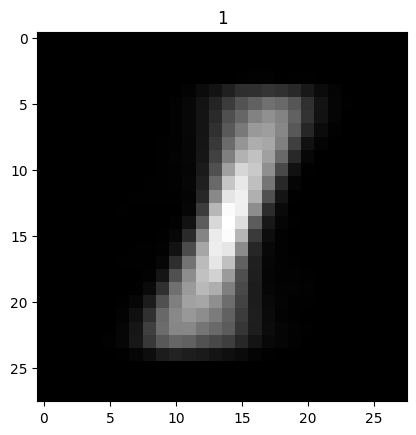

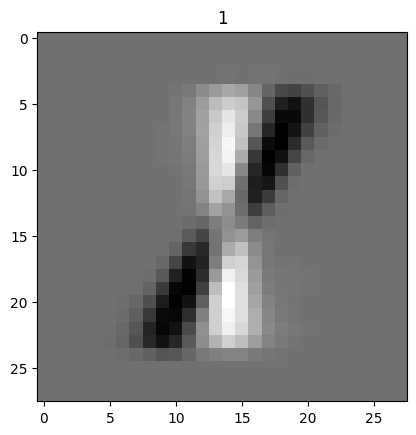

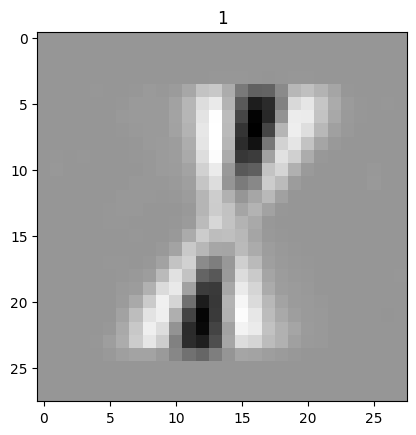

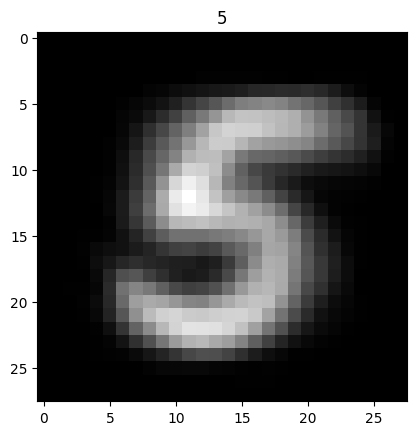

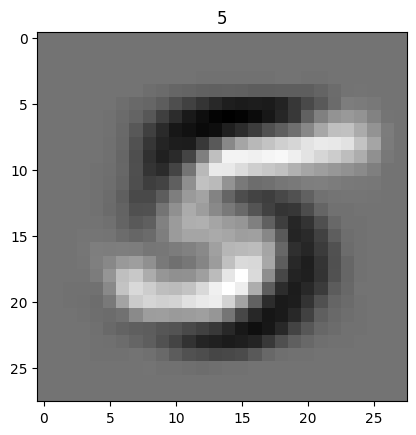

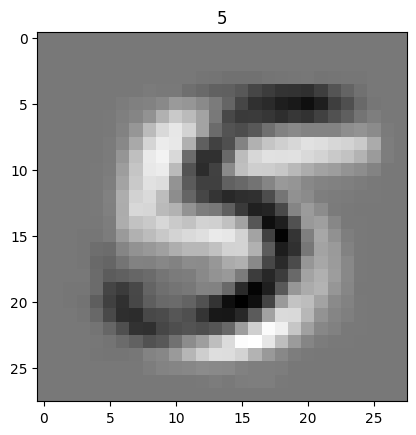

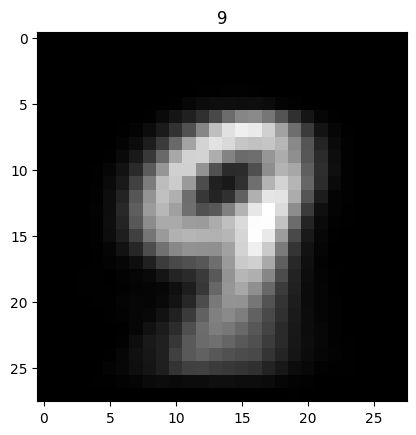

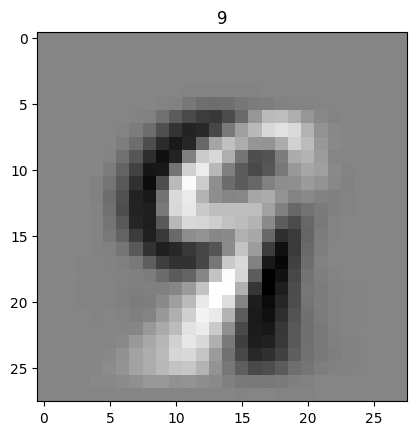

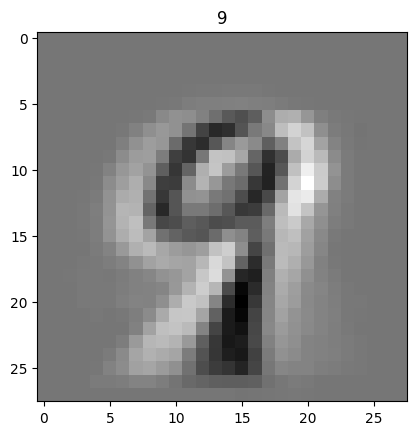

In [63]:
for i in range(1, 10, 4):
    for j in range(3):

        U_t = np.transpose(U[i])

        primer_columna = U_t[j]

        matriz = vector_a_matriz(primer_columna)

        grafico_matriz(matriz, i)

c) 

Por la forma que construimos la matriz U, las columnas de U se forman a partir de la base de autovectores de A traspuesta por A (que también son las columnas de v) y el valor singular correspondiente a cada vector de forma $u_i=(Av_i)/σ_i$

Esta columna, por estar asociada al valor singular más grande, guarda la mayor cantidad de relaciones en el set de datos. Es la imágen más representativa del set de datos.
Por eso se parece al promedio del ejercicio dos.

d) 

Éstas columnas están respectivamente asocidadas a los valores singulares siguientes. Encontramos las variaciones más frecuentes de la imágen que corresponde a la primer columna. La mayoría de imágenes que no podamos identificar con la primer columna las vamos a identificar con éstas dos.

Estas columnas son menos representativas del set de imágenes que la primera.

#### Inciso E

In [64]:
def prediccion_svd(matrices, k, cantidad_imagenes_testeo):

    r = []

    predicciones = []

    U_p = matrices[:]

    for j in range(cantidad_imagenes_testeo):

        _ , imagen_sin_indice = remover_indice_vector(datos_testeo[j])
        x = np.transpose(np.array(imagen_sin_indice))

        for i in range(10):

            U_p[i] = np.transpose( np.transpose(U_p[i])[:k] )
            proy_sobre_imagen_de_U = U_p[i]@np.transpose(U_p[i])

            r.append( np.linalg.norm( x - proy_sobre_imagen_de_U@x ) )
        
        predicciones.append( r.index(min(r)) )
        r.clear()

    return predicciones

def precision_predicciones_svd(matrices, k, cantidad_imagenes_testeo):

    precision = 0

    desaciertos = []

    aciertos = []

    predicciones = prediccion_svd(matrices, k, cantidad_imagenes_testeo)

    for i in range(len(predicciones)):

        indice_imagen, imagen_sin_indice = remover_indice_vector(datos_testeo[i])

        imagen = vector_a_matriz(imagen_sin_indice)

        if predicciones[i] == indice_imagen:

            precision += 1

            aciertos.append( (imagen, indice_imagen , predicciones[i]) )

        else:

            desaciertos.append( (imagen, indice_imagen , predicciones[i]) )

        
    precision = precision / len(predicciones)

    return precision, desaciertos, aciertos, predicciones

In [65]:
for k in range(1, 6):
    
    precision, _, _, _ = precision_predicciones_svd(U, k, 200)
    print("Precision k:",k,"=",precision)

precision, _, _, _ = precision_predicciones_svd(U, 200, 200)
print("Precision k:",200,"=",precision)



Precision k: 1 = 0.77
Precision k: 2 = 0.87
Precision k: 3 = 0.92
Precision k: 4 = 0.945
Precision k: 5 = 0.945
Precision k: 200 = 0.655


#### Ejercicio 5

Lo primero que vemos es que la presicion del SVD es mucho mejor que el promedio. Tambien vemos que el SVD con k=1 tiene igual presicion que el promedio. 
El promedio es un caso particular de SVD, estamos haciendo una combinacion lineal de las imagenes. Tomar k=1 es agarrar una unica columna de U lo que es igual a hacer una c.l. de las imagenes.

Ademas al tomar un k de mayor valor estamos teniendo en cuenta mas valores singulares, y consideramos mas variaciones de la imagen que corresponde a la 1er columna de U, que nos ayuda a identificarlas mejor. Pero si tomamos un valor muy grande de k tenemos en cuenta los valores singulares que corresponden a los casos mas particulares del set de datos. Esto nos aleja de las imagenes que representan la mayoria del set y empeora la presicion del algoritmo. 

Con esta informacion podemos buscar inteligentemente la prescion mas alta dentro de los valores mas "bajos" de k. En nuestro caso los primeros 100 valores. Cuando encontremos una presición lo suficientemente buena para lo que querramos nos quedamos con ese k.
Podemos hacer una funcion que recorra todos los k dentro del criterio de valores mas bajos y que devuelva el de maxima presicion.

Precision metodo SVD con k:3 = 92%


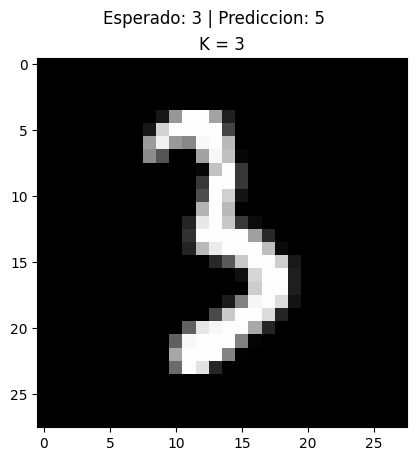

Precision metodo SVD con k:5 = 94,5%


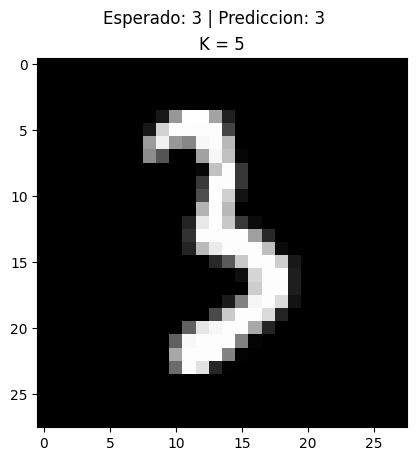

In [66]:
_, desaciertos3, aciertos3, predicciones3  = precision_predicciones_svd(U, 3, 200)
_, desaciertos5, aciertos5, predicciones5  = precision_predicciones_svd(U, 5, 200)

print('Precision metodo SVD con k:3 = 92%')
indice = desaciertos3[3][1]
prediccion = desaciertos3[3][2]
plt.title('K = 3',fontsize=12)
plt.suptitle("Esperado: {} | Prediccion: {}".format(indice, prediccion))
plt.imshow(desaciertos3[3][0], cmap='gray')
plt.show()

print('Precision metodo SVD con k:5 = 94,5%')
indice = aciertos5[39][1]
prediccion = aciertos5[39][2]
plt.title('K = 5',fontsize=12)
plt.suptitle("Esperado: {} | Prediccion: {}".format(indice, prediccion))
plt.imshow(aciertos5[39][0], cmap='gray')
plt.show()

Observamos que para el primero no acierta y para el segundo si. Esto es porque tomamos mas columnas de U, y ahora consideramos mas variaciones de las imagenes. Como el k no es tan grande en relacion a las columnas de la matriz la presicion mejora.